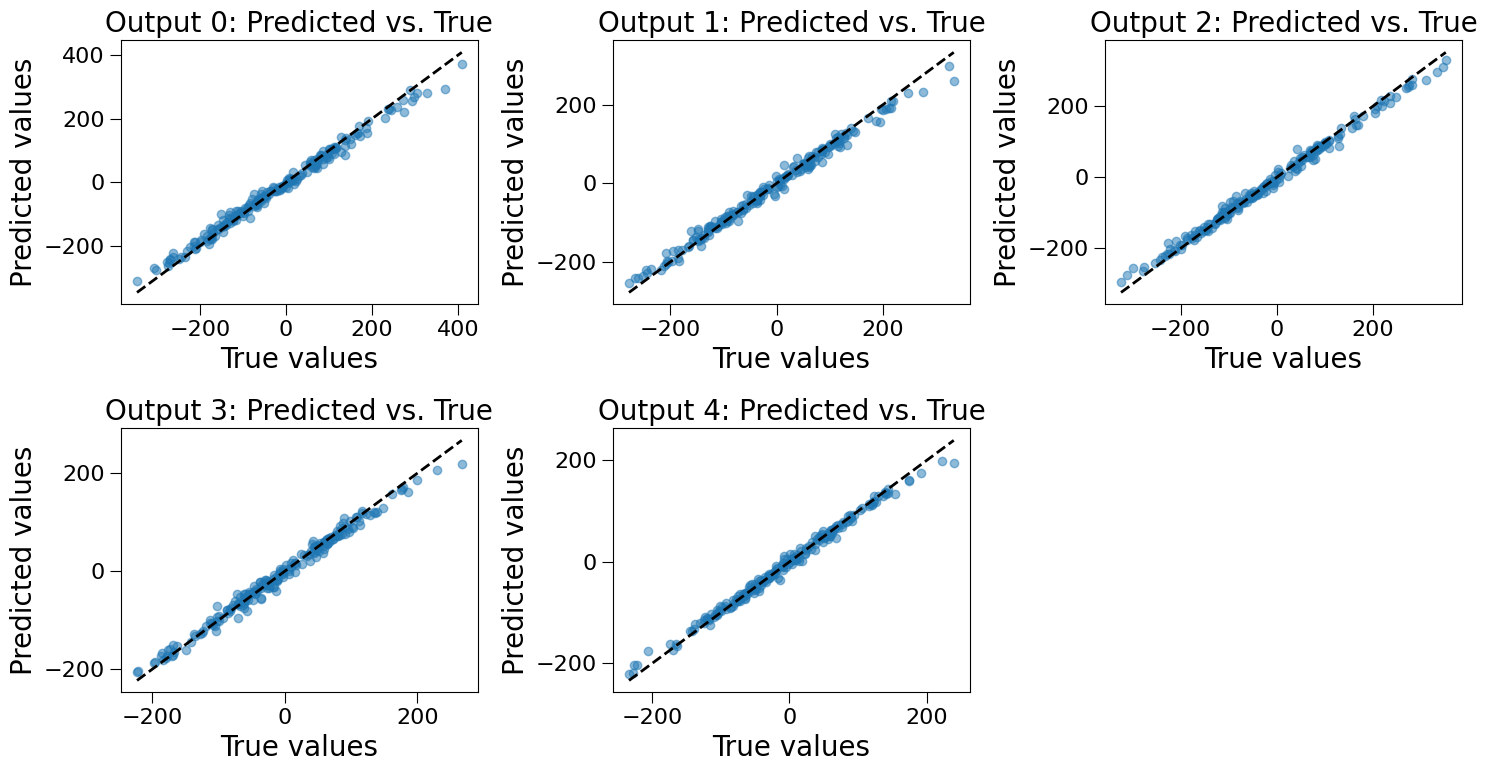

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Parameters
n_targets = 5  # Change to any number of outputs

# Generate fake data
X, Y = make_regression(
    n_samples=200, n_features=4, n_targets=n_targets, noise=0.3, random_state=0
)
feature_names = [f"feature_{i}" for i in range(X.shape[1])]

# Fit multioutput regressor
regr = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=0))
regr.fit(X, Y)
Y_pred = regr.predict(X)

# Plot: Predicted vs. True for each output
n_cols = min(n_targets, 3)
n_rows = int(np.ceil(n_targets / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

axs = np.array(axs).reshape(-1)  # Flatten for easy indexing

for i in range(n_targets):
    axs[i].scatter(Y[:, i], Y_pred[:, i], alpha=0.5)
    axs[i].plot([Y[:, i].min(), Y[:, i].max()], [Y[:, i].min(), Y[:, i].max()], 'k--', lw=2)
    axs[i].set_xlabel("True values")
    axs[i].set_ylabel("Predicted values")
    axs[i].set_title(f"Output {i}: Predicted vs. True")

# Hide unused subplots, if any
for j in range(n_targets, n_rows * n_cols):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()



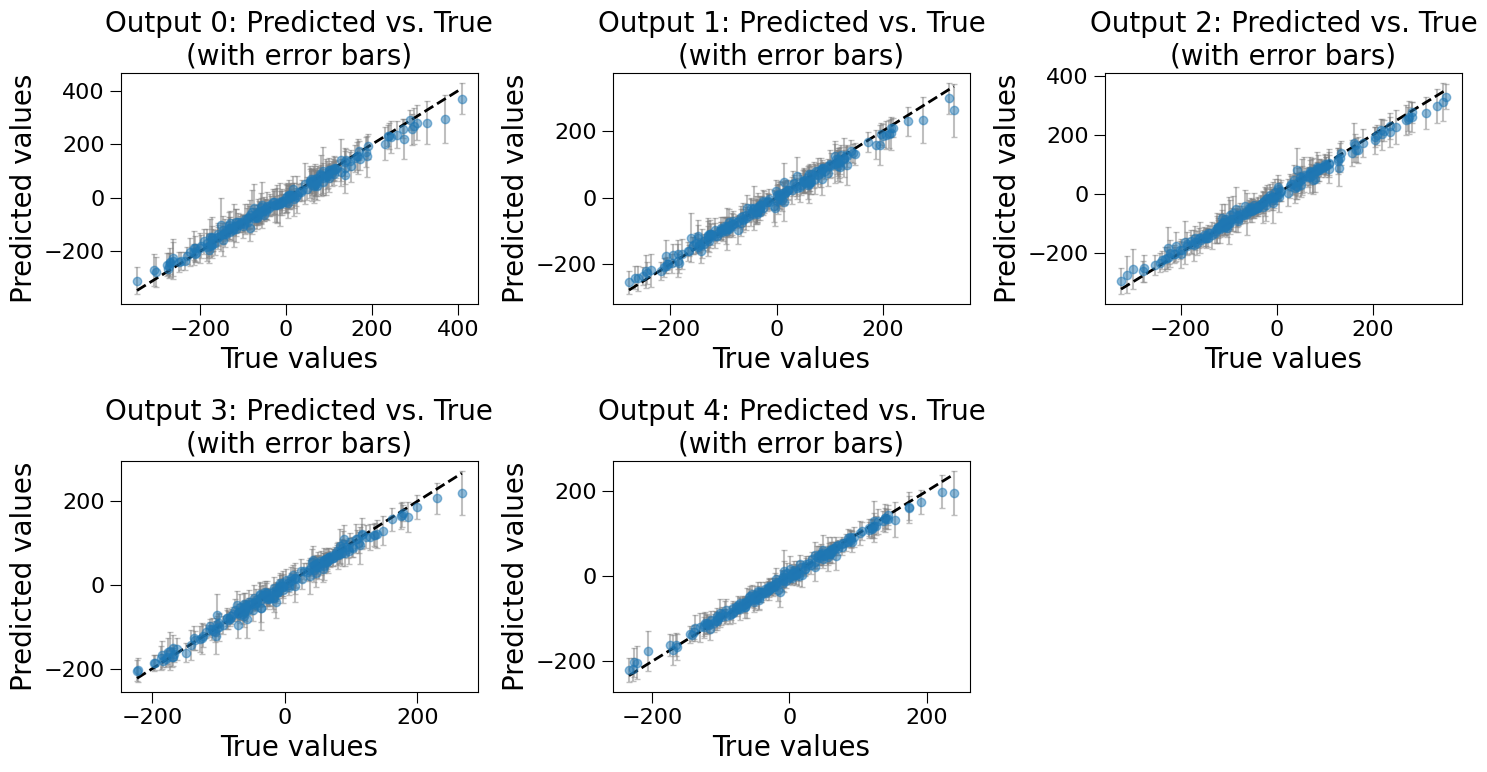

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

def plot_multioutput_predictions_with_error_bars(Y_true, Y_pred, Y_std, n_cols=3):
    """
    Plot predicted vs true values with error bars for multi-output regression.

    Parameters:
    - Y_true: shape (n_samples, n_outputs)
    - Y_pred: shape (n_samples, n_outputs)
    - Y_std:  shape (n_samples, n_outputs) standard deviation of prediction per output
    - n_cols: number of subplot columns (default: 3)
    """
    n_targets = Y_true.shape[1]
    n_rows = int(np.ceil(n_targets / n_cols))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axs = np.array(axs).reshape(-1)

    for i in range(n_targets):
        axs[i].errorbar(
            Y_true[:, i], Y_pred[:, i], yerr=Y_std[:, i], fmt='o', alpha=0.5, ecolor='gray', capsize=2
        )
        axs[i].plot(
            [Y_true[:, i].min(), Y_true[:, i].max()],
            [Y_true[:, i].min(), Y_true[:, i].max()],
            'k--',
            lw=2
        )
        axs[i].set_xlabel("True values")
        axs[i].set_ylabel("Predicted values")
        axs[i].set_title(f"Output {i}: Predicted vs. True\n(with error bars)")

    for j in range(n_targets, n_rows * n_cols):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# --- Sample usage ---

n_targets = 5
X, Y = make_regression(
    n_samples=200, n_features=4, n_targets=n_targets, noise=0.3, random_state=0
)
regr = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=0))
regr.fit(X, Y)
Y_pred = regr.predict(X)

# Compute std deviation of tree predictions for each sample/output
Y_std = np.zeros_like(Y_pred)
for i, estimator in enumerate(regr.estimators_):
    all_tree_preds = np.array([tree.predict(X) for tree in estimator.estimators_])
    Y_std[:, i] = all_tree_preds.std(axis=0)

# Plot using the function
plot_multioutput_predictions_with_error_bars(Y, Y_pred, Y_std)



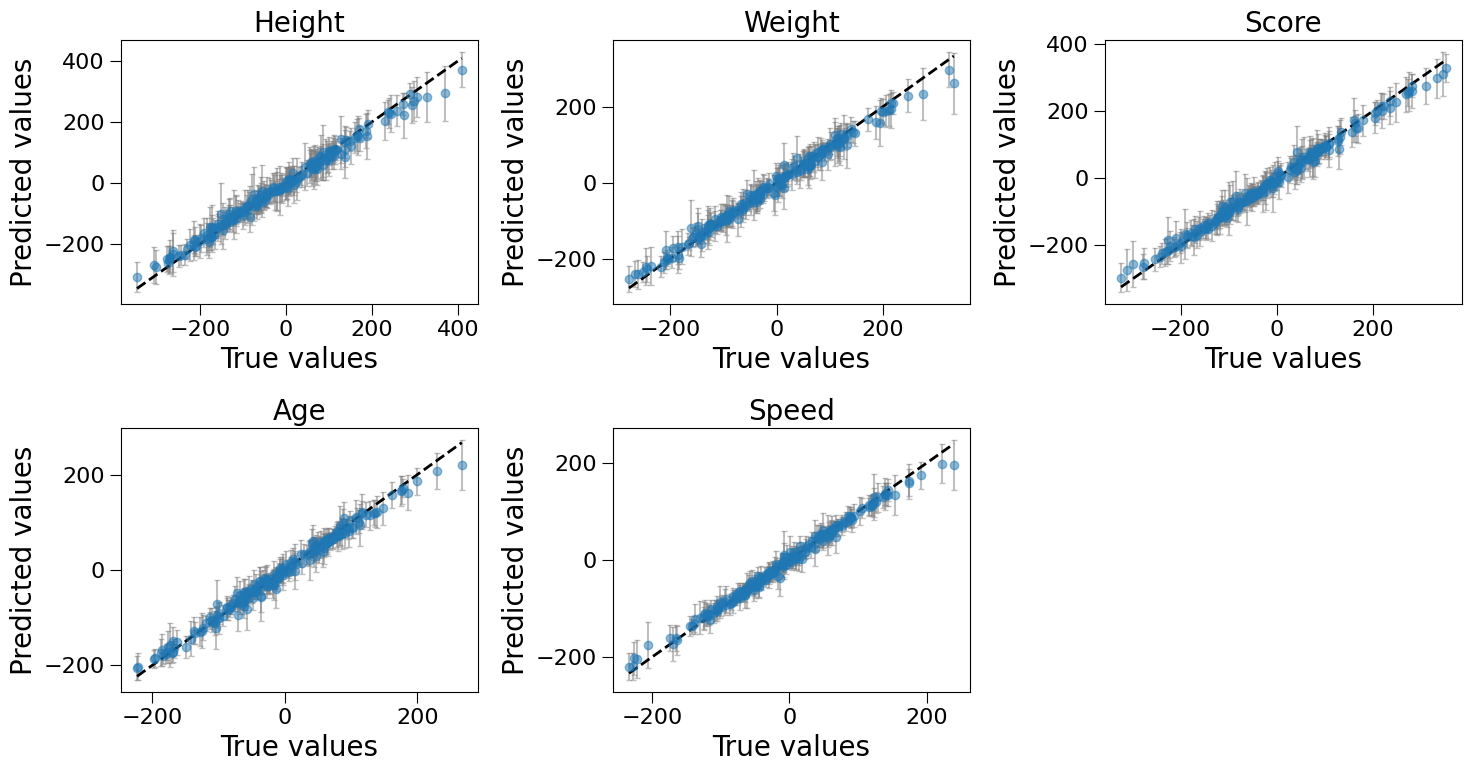

In [3]:
def plot_multioutput_predictions_with_error_bars(Y_true, Y_pred, Y_std, output_names=None, n_cols=3):
    """
    Plot predicted vs true values with error bars for multi-output regression.

    Parameters:
    - Y_true: shape (n_samples, n_outputs)
    - Y_pred: shape (n_samples, n_outputs)
    - Y_std:  shape (n_samples, n_outputs) standard deviation of prediction per output
    - output_names: list of names for output variables (optional)
    - n_cols: number of subplot columns (default: 3)
    """
    n_targets = Y_true.shape[1]
    n_rows = int(np.ceil(n_targets / n_cols))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axs = np.array(axs).reshape(-1)

    # Use provided names or default
    if output_names is None:
        output_names = [f"Output {i}" for i in range(n_targets)]

    for i in range(n_targets):
        axs[i].errorbar(
            Y_true[:, i], Y_pred[:, i], yerr=Y_std[:, i], fmt='o', alpha=0.5, ecolor='gray', capsize=2
        )
        axs[i].plot(
            [Y_true[:, i].min(), Y_true[:, i].max()],
            [Y_true[:, i].min(), Y_true[:, i].max()],
            'k--',
            lw=2
        )
        axs[i].set_xlabel("True values")
        axs[i].set_ylabel("Predicted values")
        axs[i].set_title(output_names[i])

    for j in range(n_targets, n_rows * n_cols):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Use the same regression problem from above
output_names = ["Height", "Weight", "Score", "Age", "Speed"]

plot_multioutput_predictions_with_error_bars(Y, Y_pred, Y_std, output_names)



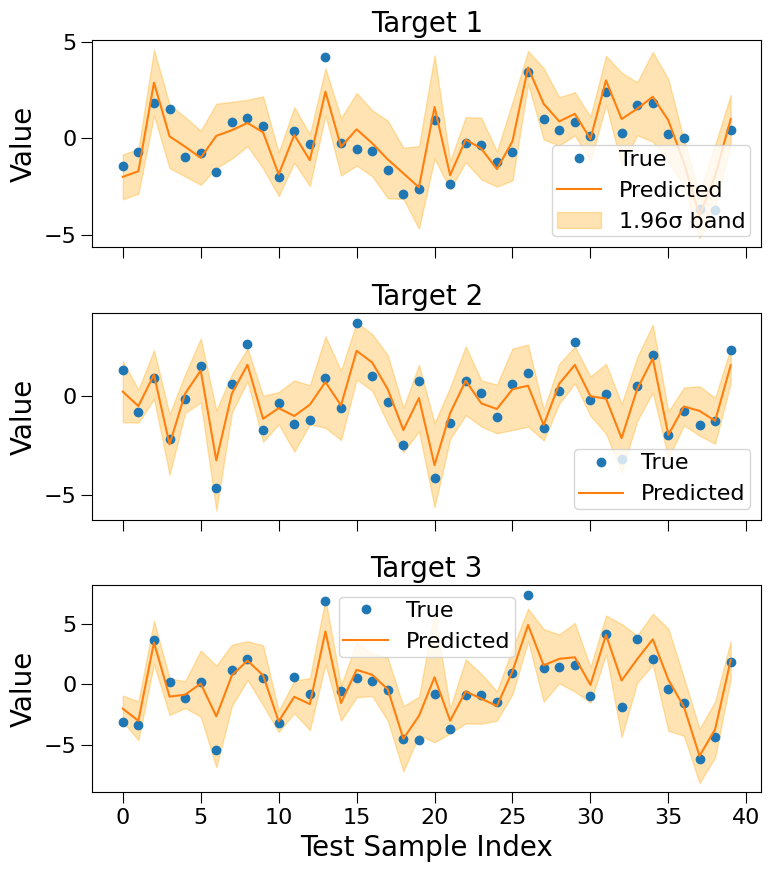

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def plot_multioutput_confidence_intervals(
    X, Y, z=1.96, base_estimator=None, test_size=0.2, random_state=42
):
    """
    Fit a MultiOutputRegressor and plot predictions with z-scaled confidence intervals.

    Parameters
    ----------
    X : np.ndarray
        Feature matrix of shape (n_samples, n_features).
    Y : np.ndarray
        Target matrix of shape (n_samples, n_targets).
    z : float
        Z-value for confidence interval (e.g., 1.96 for 95% CI).
    base_estimator : sklearn estimator, optional
        Regressor to use in MultiOutputRegressor (default: RandomForestRegressor).
    test_size : float
        Fraction of data to use for testing.
    random_state : int
        Random seed for reproducibility.
    """
    if base_estimator is None:
        base_estimator = RandomForestRegressor(n_estimators=100, random_state=random_state)
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=random_state
    )
    model = MultiOutputRegressor(base_estimator)
    model.fit(X_train, Y_train)
    
    means = []
    stds = []
    for est in model.estimators_:
        preds = np.array([tree.predict(X_test) for tree in est.estimators_])
        means.append(preds.mean(axis=0))
        stds.append(preds.std(axis=0))
    means = np.stack(means, axis=1)
    stds = np.stack(stds, axis=1)

    n_targets = Y.shape[1]
    fig, axes = plt.subplots(n_targets, 1, figsize=(8, 3*n_targets), sharex=True)
    if n_targets == 1:
        axes = [axes]
    x_axis = np.arange(X_test.shape[0])

    for i in range(n_targets):
        ax = axes[i]
        ax.plot(x_axis, Y_test[:, i], 'o', label='True')
        ax.plot(x_axis, means[:, i], '-', label='Predicted')
        ax.fill_between(
            x_axis,
            means[:, i] - z * stds[:, i],
            means[:, i] + z * stds[:, i],
            color='orange',
            alpha=0.3,
            label=f'{z:.2f}σ band' if i == 0 else None,
        )
        ax.set_title(f'Target {i+1}')
        ax.legend()
        ax.set_ylabel('Value')
    axes[-1].set_xlabel('Test Sample Index')
    plt.tight_layout()
    plt.show()

# Generate example data and run the function
n_samples = 200
n_features = 3
n_targets = 3
rng = np.random.RandomState(42)
X = rng.randn(n_samples, n_features)
Y = X @ rng.randn(n_features, n_targets) + rng.randn(n_samples, n_targets) * 0.5

plot_multioutput_confidence_intervals(X, Y, z=1.96)




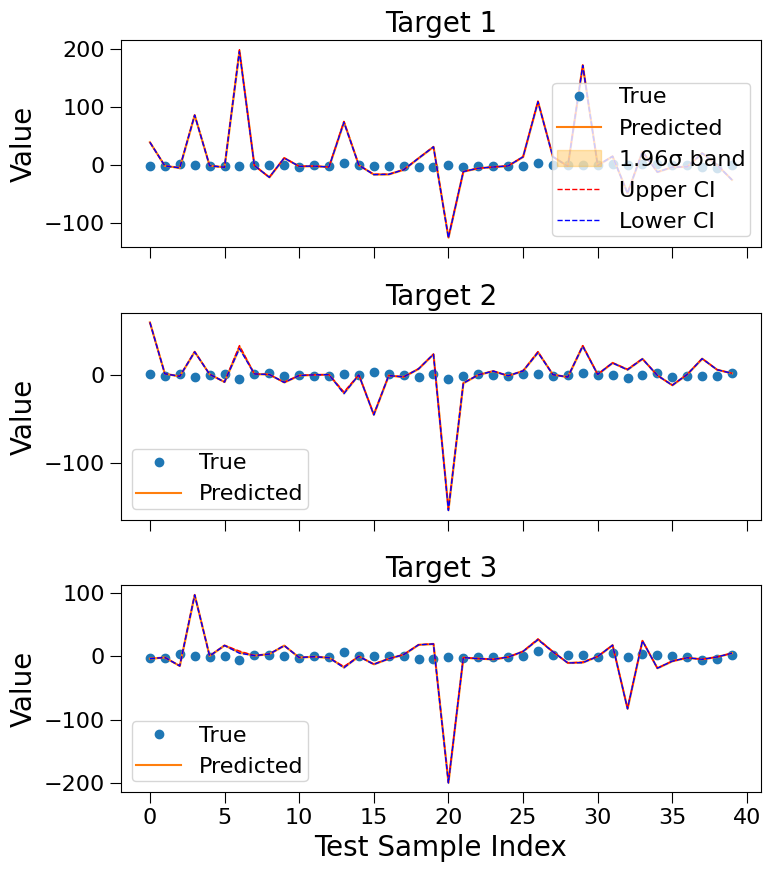

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split

def plot_multioutput_gp_confidence_intervals(
    X, Y, z=1.96, base_estimator=None, test_size=0.2, random_state=42
):
    """
    Fit a MultiOutputRegressor with GP base and plot predictions with z-scaled confidence intervals.
    Adds upper and lower confidence interval bounds as dashed lines.
    """
    if base_estimator is None:
        base_estimator = GaussianProcessRegressor(random_state=random_state)
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=test_size, random_state=random_state
    )
    model = MultiOutputRegressor(base_estimator)
    model.fit(X_train, Y_train)
    
    means = []
    stds = []
    for est in model.estimators_:
        pred, std = est.predict(X_test, return_std=True)
        means.append(pred)
        stds.append(std)
    means = np.stack(means, axis=1)
    stds = np.stack(stds, axis=1)

    n_targets = Y.shape[1]
    fig, axes = plt.subplots(n_targets, 1, figsize=(8, 3*n_targets), sharex=True)
    if n_targets == 1:
        axes = [axes]
    x_axis = np.arange(X_test.shape[0])

    for i in range(n_targets):
        ax = axes[i]
        upper = means[:, i] + z * stds[:, i]
        lower = means[:, i] - z * stds[:, i]
        ax.plot(x_axis, Y_test[:, i], 'o', label='True')
        ax.plot(x_axis, means[:, i], '-', label='Predicted')
        ax.fill_between(
            x_axis,
            lower,
            upper,
            color='orange',
            alpha=0.3,
            label=f'{z:.2f}σ band' if i == 0 else None,
        )
        ax.plot(x_axis, upper, 'r--', linewidth=1, label='Upper CI' if i == 0 else None)
        ax.plot(x_axis, lower, 'b--', linewidth=1, label='Lower CI' if i == 0 else None)
        ax.set_title(f'Target {i+1}')
        ax.legend()
        ax.set_ylabel('Value')
    axes[-1].set_xlabel('Test Sample Index')
    plt.tight_layout()
    plt.show()

# Reuse the previous example data
plot_multioutput_gp_confidence_intervals(X, Y, z=1.96)




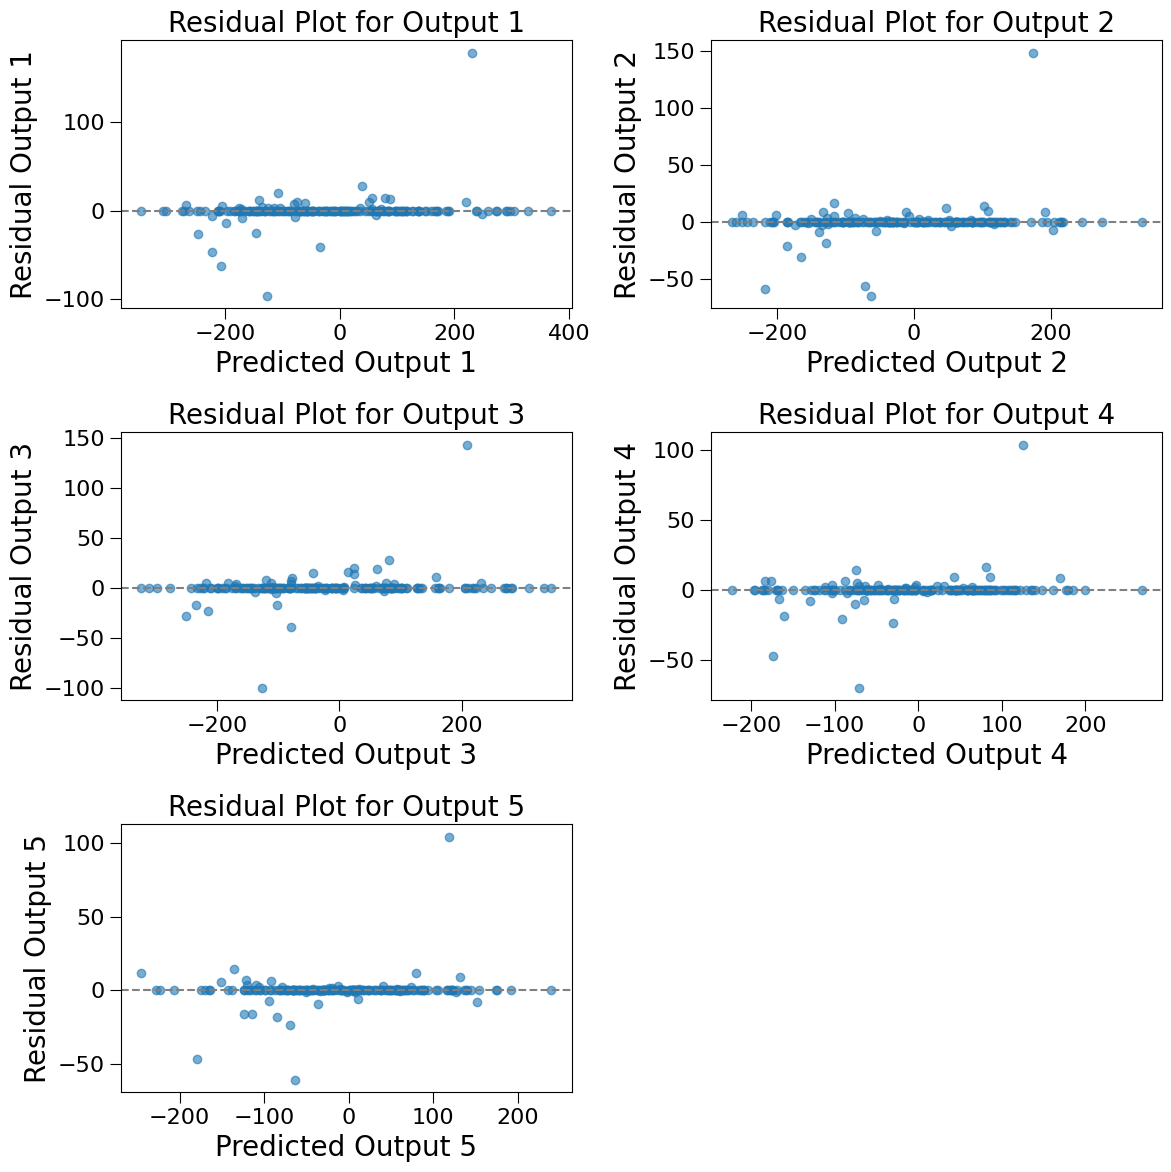

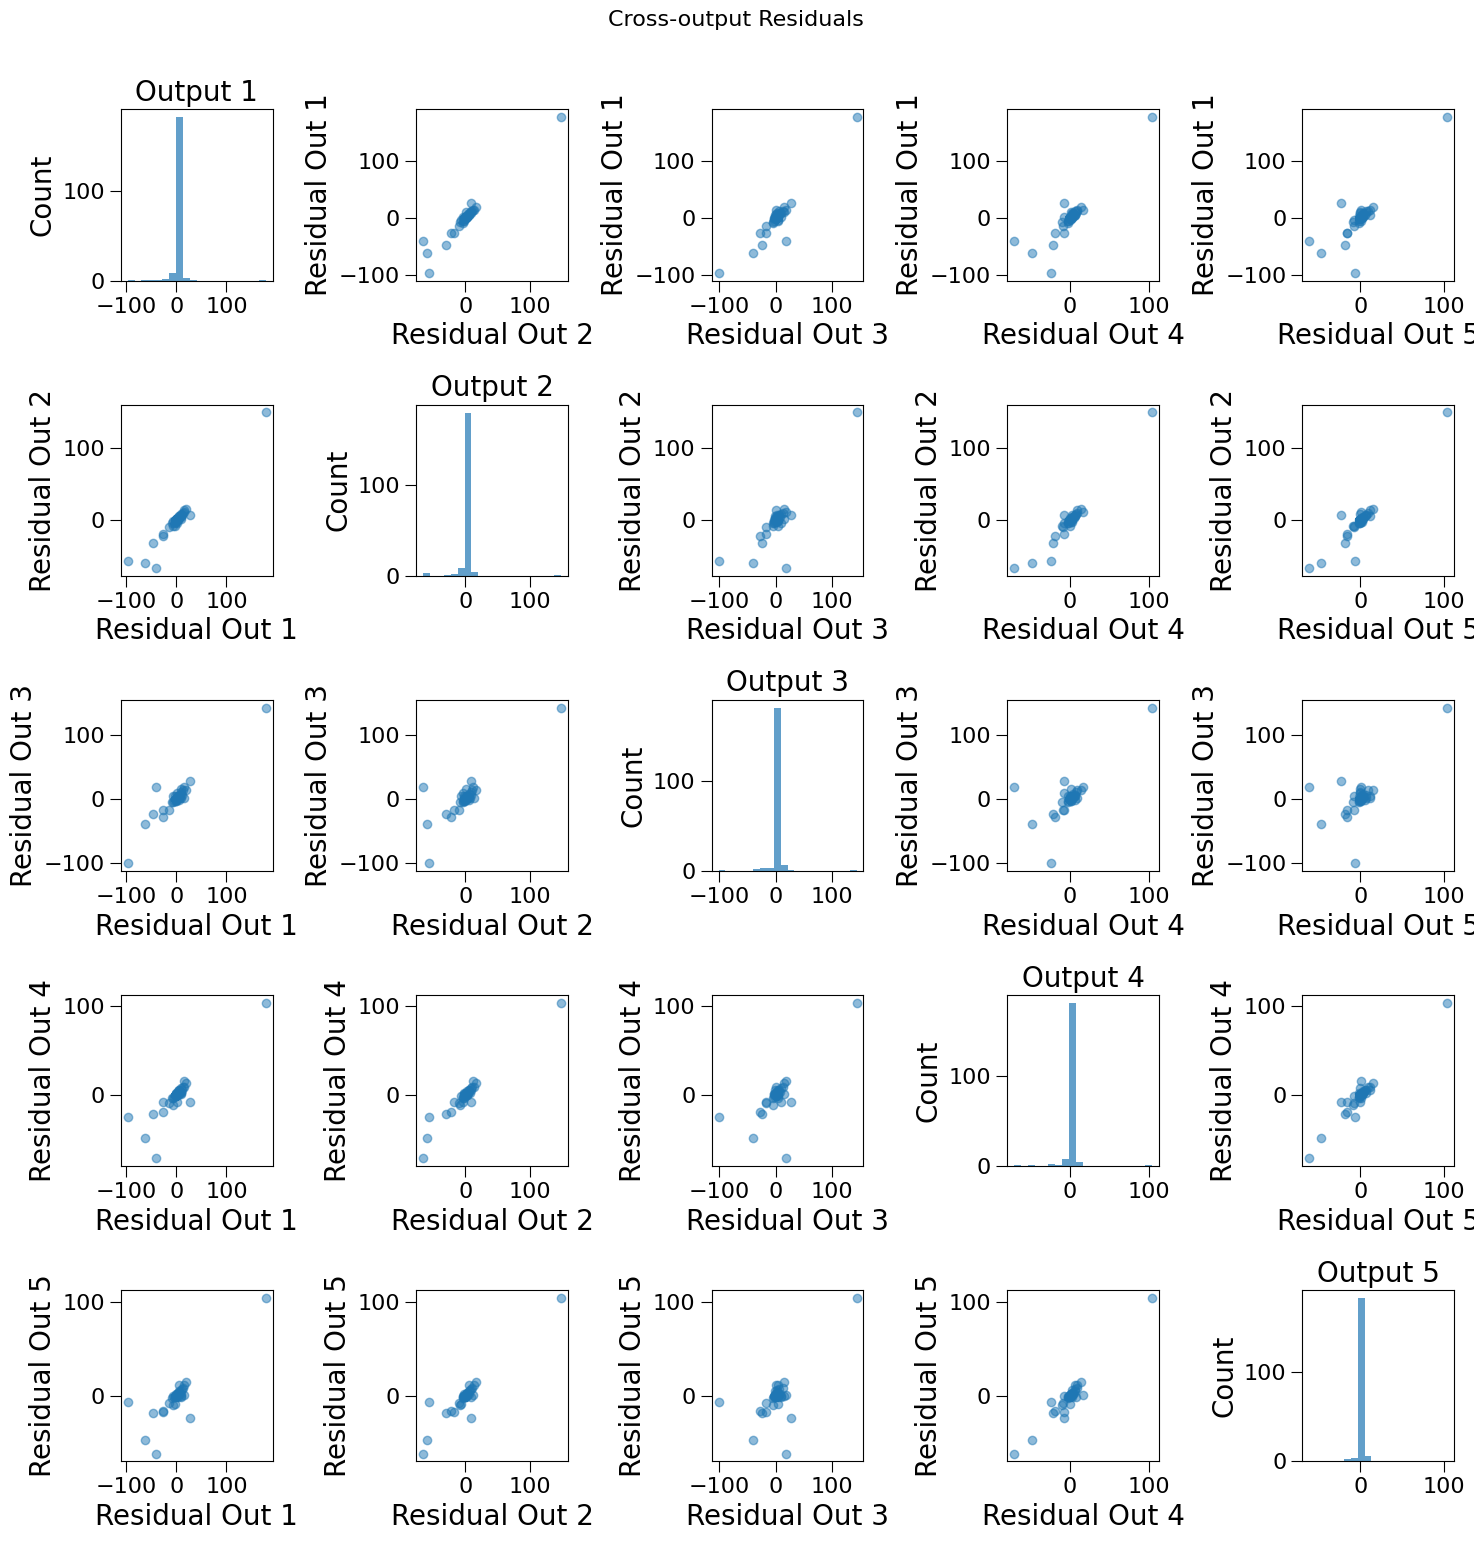

In [16]:
import numpy as np
import matplotlib.pyplot as plt

random_state = 42
test_size = 0.2
n_targets = 5

X, y = make_regression(
    n_samples=200, n_features=4, n_targets=n_targets, noise=0.3, random_state=0
)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
)

base_estimator = GaussianProcessRegressor(random_state=random_state)
multi_gpr = MultiOutputRegressor(base_estimator)
multi_gpr.fit(X_train, Y_train)

# Predict on X (or X_test)
y_pred = multi_gpr.predict(X)
residuals = y - y_pred
n_outputs = residuals.shape[1]

# -------- Residual Plots for Each Output --------
ncols = 2
nrows = int(np.ceil(n_outputs / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows), squeeze=False)

for i in range(n_outputs):
    r, c = divmod(i, ncols)
    ax = axs[r][c]
    ax.scatter(y_pred[:, i], residuals[:, i], alpha=0.6)
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_xlabel(f'Predicted Output {i+1}')
    ax.set_ylabel(f'Residual Output {i+1}')
    ax.set_title(f'Residual Plot for Output {i+1}')
for j in range(i+1, nrows*ncols):
    axs[divmod(j, ncols)].set_visible(False)
plt.tight_layout()
plt.show()

# -------- Cross-output Residual Plot (Matrix) --------
import itertools

fig, axs = plt.subplots(n_outputs, n_outputs, figsize=(3 * n_outputs, 3 * n_outputs))
for i, j in itertools.product(range(n_outputs), repeat=2):
    ax = axs[i, j]
    if i == j:
        # Diagonal: histogram of residuals for that output
        ax.hist(residuals[:, i], bins=20, alpha=0.7)
        ax.set_title(f'Output {i+1}')
        ax.set_ylabel('Count')
    else:
        # Off-diagonal: scatter plot of residuals between outputs
        ax.scatter(residuals[:, j], residuals[:, i], alpha=0.5)
        ax.set_xlabel(f'Residual Out {j+1}')
        ax.set_ylabel(f'Residual Out {i+1}')
plt.tight_layout()
plt.suptitle("Cross-output Residuals", y=1.03, fontsize=16)
plt.show()
